In [34]:
#import required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv('/content/drive/MyDrive/Machine_Learning/Project/creditcard (1).csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
#check size of the dataset
df.shape

(284807, 31)

In [37]:
#check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [38]:
#cross check null values with data type
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

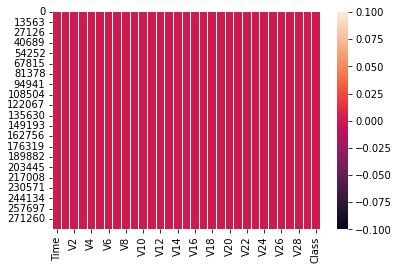

In [39]:
#visualize null values
sb.heatmap(df.isnull())
plt.show()

In [40]:
#check for duplicate values
df.duplicated().sum()

1081

In [41]:
#check for data balancing
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

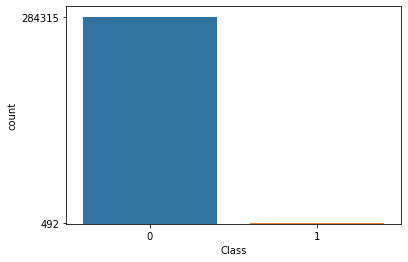

In [42]:
#Visualize data balancing
sb.countplot(data=df,x='Class')
f=df['Class'].value_counts()
plt.yticks(f)
plt.show()

In [43]:
#here we the data is unbalanced, so we need to balance the data
#Firstly we select the input and output
X=df[['Time','Amount']]
Y=df['Class']

In [44]:
#Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [45]:
#check training data size
X_train.shape,Y_train.shape

((199364, 2), (199364,))

In [46]:
#check testing data size
X_test.shape,Y_test.shape

((85443, 2), (85443,))

In [47]:
#check data balancing of testing output data
Y_test.value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [48]:
#apply standard scaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [49]:
#apply scaling on input
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [50]:
#Now we perform data balancing
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()

In [51]:
#apply data balancing on training and testing data
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [52]:
#check data balancing
Y_test1.value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [53]:
Y_train1.value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [54]:
#create neural network
import tensorflow as tf
model=tf.keras.Sequential([
    #firt hidden layer
    tf.keras.layers.Dense(units=64,activation='relu',input_shape=(X.shape[1],)),
    #second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu'),
    #third hidden layer
    tf.keras.layers.Dense(units=16,activation='relu'),
    #fouth hidden layer
    tf.keras.layers.Dense(units=8,activation='relu'),
    #output layer
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [55]:
#check model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                192       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [56]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
#create a procedure for early stopping 
#call inbuilt class : EarlyStopping 
from tensorflow.keras.callbacks import EarlyStopping
#create object of EarlyStopping class
cb=EarlyStopping(monitor='val_loss',min_delta=0.00001,patience=20,
                 verbose=1,mode='auto',baseline=None,restore_best_weights=False

)

In [58]:
#train the model
trained_model=model.fit(X_train1,Y_train1,epochs=5000,validation_data=(X_test1,Y_test1),batch_size=64,callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 20s 3ms/step - loss: 0.5677 - accuracy: 0.7073 - val_loss: 0.6604 - val_accuracy: 0.6613
Epoch 2/5000
6219/6219 [==============================] - 17s 3ms/step - loss: 0.5124 - accuracy: 0.7465 - val_loss: 0.6372 - val_accuracy: 0.6727
Epoch 3/5000
6219/6219 [==============================] - 19s 3ms/step - loss: 0.4960 - accuracy: 0.7541 - val_loss: 0.6990 - val_accuracy: 0.6812
Epoch 4/5000
6219/6219 [==============================] - 21s 3ms/step - loss: 0.4802 - accuracy: 0.7621 - val_loss: 0.7548 - val_accuracy: 0.6512
Epoch 5/5000
6219/6219 [==============================] - 17s 3ms/step - loss: 0.4671 - accuracy: 0.7709 - val_loss: 0.8208 - val_accuracy: 0.6514
Epoch 6/5000
6219/6219 [==============================] - 33s 5ms/step - loss: 0.4544 - accuracy: 0.7785 - val_loss: 0.9164 - val_accuracy: 0.6876
Epoch 7/5000
6219/6219 [==============================] - 23s 4ms/step - loss: 0.4426 - accuracy: 0.7841 - val_loss: 1

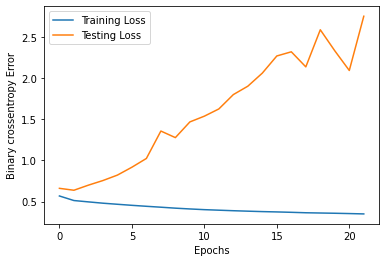

In [59]:
#visualisation for loss of training and testing
plt.plot(trained_model.history['loss'],label='Training Loss')
plt.plot(trained_model.history['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary crossentropy Error')
plt.legend()
plt.show()

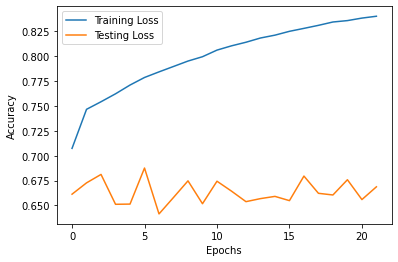

In [60]:
#visualisation for accuracy of training and testing
plt.plot(trained_model.history['accuracy'],label='Training Loss')
plt.plot(trained_model.history['val_accuracy'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [61]:
#Here we see that model is overfit
#Handle overfitting using dropout
#dropout range between 20% to 50%
#create neaural network 
import tensorflow as tf
from tensorflow.keras.layers import Dropout
#create object of Sequential class
model1=tf.keras.Sequential([
    #first hidden layer 
    tf.keras.layers.Dense(units=64,activation='relu',input_shape=(X.shape[1],)),Dropout(0.30),
    #second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu'),Dropout(0.30),
    #Third hidden layer
    tf.keras.layers.Dense(units=16,activation='relu'),Dropout(0.30),
    #fourth hidden layer
    tf.keras.layers.Dense(units=8,activation='relu'),
    #output layer 
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [62]:
#compile the model
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
#train the model
trained_model1=model1.fit(X_train1,Y_train1,epochs=5000,validation_data=(X_test1,Y_test1),batch_size=64,callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 20s 3ms/step - loss: 0.6362 - accuracy: 0.6417 - val_loss: 0.6190 - val_accuracy: 0.6631
Epoch 2/5000
6219/6219 [==============================] - 18s 3ms/step - loss: 0.5808 - accuracy: 0.7043 - val_loss: 0.6173 - val_accuracy: 0.6836
Epoch 3/5000
6219/6219 [==============================] - 19s 3ms/step - loss: 0.5655 - accuracy: 0.7156 - val_loss: 0.6116 - val_accuracy: 0.6876
Epoch 4/5000
6219/6219 [==============================] - 21s 3ms/step - loss: 0.5591 - accuracy: 0.7202 - val_loss: 0.6163 - val_accuracy: 0.6743
Epoch 5/5000
6219/6219 [==============================] - 21s 3ms/step - loss: 0.5560 - accuracy: 0.7215 - val_loss: 0.6323 - val_accuracy: 0.6721
Epoch 6/5000
6219/6219 [==============================] - 26s 4ms/step - loss: 0.5520 - accuracy: 0.7237 - val_loss: 0.6202 - val_accuracy: 0.6781
Epoch 7/5000
6219/6219 [==============================] - 25s 4ms/step - loss: 0.5512 - accuracy: 0.7238 - val_loss: 0

In [64]:
#Evaluate the model
print('Training loss and Accuracy:',model1.evaluate(X_train1,Y_train1))
print('Testing loss and Accuracy:',model1.evaluate(X_test1,Y_test1))

12438/12438 [==============================] - 19s 2ms/step - loss: 0.5212 - accuracy: 0.7480
Training loss and Accuracy: [0.5212175846099854, 0.7480340003967285]
5332/5332 [==============================] - 8s 2ms/step - loss: 0.6339 - accuracy: 0.6825
Testing loss and Accuracy: [0.6339290142059326, 0.6824623942375183]


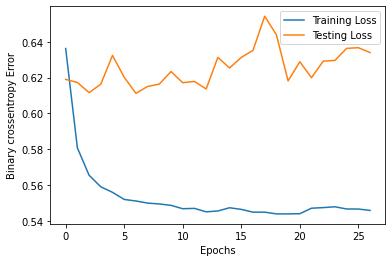

In [65]:
#visualisation for loss of training and testing
plt.plot(trained_model1.history['loss'],label='Training Loss')
plt.plot(trained_model1.history['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary crossentropy Error')
plt.legend()
plt.show()

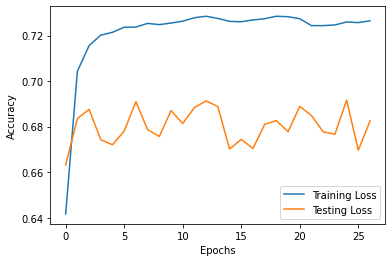

In [66]:
#visualisation for accuracy of training and testing
plt.plot(trained_model1.history['accuracy'],label='Training Loss')
plt.plot(trained_model1.history['val_accuracy'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
#here we see that training score > testting score 
#Clearly the model is overfit
#use second  method to handle overfitting, that is regularisation l2
#create neaural network 
from tensorflow.keras import regularizers
#create object of Sequential class
model2=tf.keras.Sequential([
    #first hidden layer 
    tf.keras.layers.Dense(units=64,activation='relu',
                          kernel_regularizer=regularizers.l2(0.01),input_shape=(X.shape[1],)),Dropout(0.30),
    #second hidden layer
    tf.keras.layers.Dense(units=32,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.30),
    #Third hidden layer
    tf.keras.layers.Dense(units=16,activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.30),
    #fourth hidden layer
    tf.keras.layers.Dense(units=8,activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    #output layer 
    tf.keras.layers.Dense(units=1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))
])

In [68]:
#compile the model
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
#train the model with 70% data
trained_model2=model2.fit(X_train1,Y_train1,epochs=5000,validation_data=(X_test1,Y_test1),batch_size=64,callbacks=cb)

Epoch 1/5000
6219/6219 [==============================] - 27s 4ms/step - loss: 0.7064 - accuracy: 0.5023 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5000
6219/6219 [==============================] - 20s 3ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5000
6219/6219 [==============================] - 21s 3ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5000
6219/6219 [==============================] - 21s 3ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5000
6219/6219 [==============================] - 19s 3ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/5000
6219/6219 [==============================] - 24s 4ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/5000
6219/6219 [==============================] - 19s 3ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0

In [70]:
#Evaluate the model
print('Training loss and Accuracy:',model2.evaluate(X_train1,Y_train1))
print('Testing loss and Accuracy:',model2.evaluate(X_test1,Y_test1))
#testing score and training score are same
#but score can be better

12438/12438 [==============================] - 20s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Training loss and Accuracy: [0.6932011246681213, 0.5]
5332/5332 [==============================] - 9s 2ms/step - loss: 0.6932 - accuracy: 0.5000
Testing loss and Accuracy: [0.6931778788566589, 0.5]


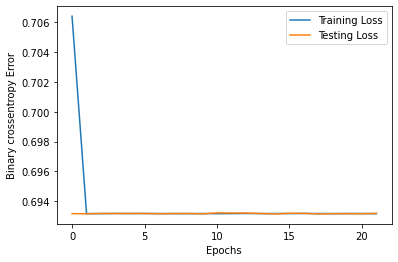

In [71]:
#visualisation for loss of training and testing
plt.plot(trained_model2.history['loss'],label='Training Loss')
plt.plot(trained_model2.history['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary crossentropy Error')
plt.legend()
plt.show()

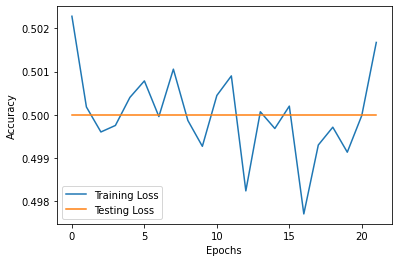

In [72]:
#visualisation for accuracy of training and testing
plt.plot(trained_model2.history['accuracy'],label='Training Loss')
plt.plot(trained_model2.history['val_accuracy'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [73]:
#Test the model with 30% data
Y_pred=model1.predict(X_test1).round(2)

5332/5332 [==============================] - 7s 1ms/step


In [74]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [75]:
#generate classification report 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71     85308
           1       0.73      0.58      0.64     85308

    accuracy                           0.68    170616
   macro avg       0.69      0.68      0.68    170616
weighted avg       0.69      0.68      0.68    170616

[[67235 18073]
 [36214 49094]]
